In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/global_superstore_2016.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [ ]:
df.shape

(51290, 24)

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [ ]:
df['Shipping Cost'] = df['Sales'] - df['Profit']
total_cost = df['Shipping Cost'].sum()
print(f"Total Cost: {total_cost}")

Total Cost: 11175044.6186


[Text(0, 0, '286397'),
 Text(0, 0, '150683'),
 Text(0, 0, '129051'),
 Text(0, 0, '111900'),
 Text(0, 0, '109029')]

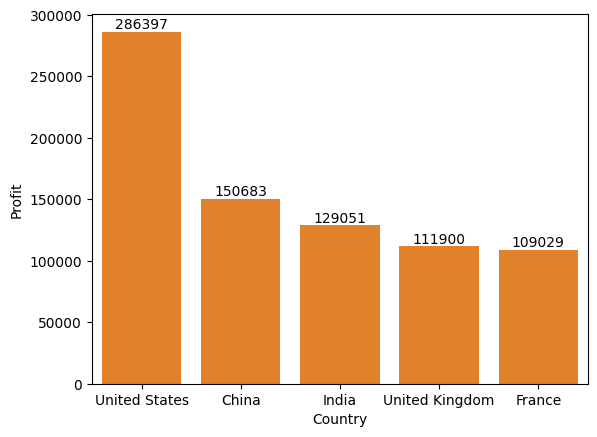

In [ ]:
profit_india = df.groupby(['Country'],as_index=False)['Profit'].sum().sort_values(by='Profit',ascending=False).head()
sns.barplot(x='Country',y='Profit',data=profit_india).bar_label(sns.barplot(x='Country',y='Profit',data=profit_india).containers[0])

<Axes: xlabel='Country', ylabel='Shipping Cost'>

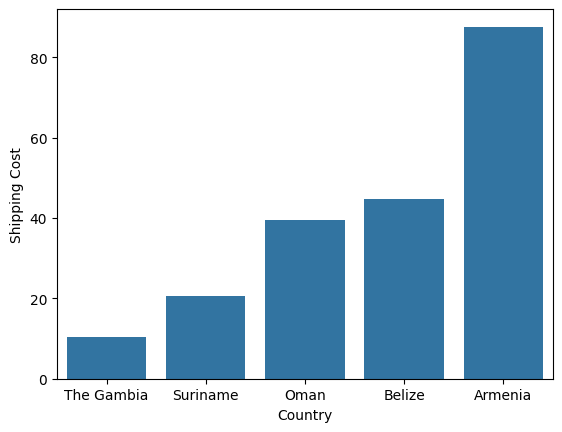

In [ ]:
profit_india = df.groupby(['Country'],as_index=False)['Shipping Cost'].sum().sort_values(by='Shipping Cost',ascending=True).head()
sns.barplot(x='Country',y='Shipping Cost',data=profit_india)

Total sales in 2015: 4299865.87056


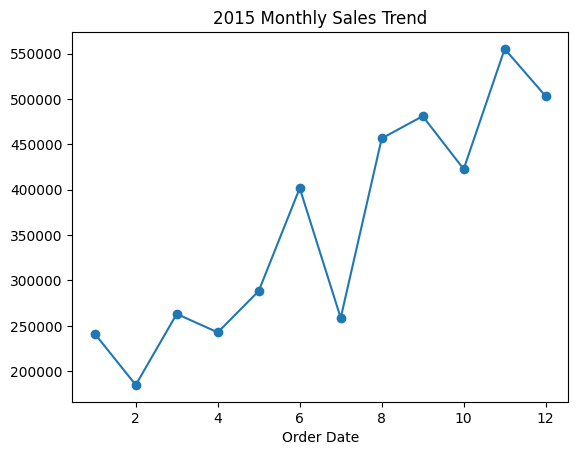

In [ ]:
sales_2015_monthly = df[df['Order Date'].dt.year == 2015].groupby(df['Order Date'].dt.month)['Sales'].sum()
sales_2015_monthly.plot(kind='line', marker='o', title='2015 Monthly Sales Trend')
print(f"Total sales in 2015: {sales_2015_monthly.sum()}")

In [ ]:
sales_2014 = df[df['Order Date'].dt.year == 2014]['Sales'].sum()
sales_2015 = df[df['Order Date'].dt.year == 2015]['Sales'].sum()
sales_difference = sales_2015 - sales_2014
print(f"Total sales in 2014: {sales_2014}")
print(f"Difference between 2015 and 2014 sales: {sales_difference}")

Total sales in 2014: 3405746.44938
Difference between 2015 and 2014 sales: 894119.4211800005


[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3')]

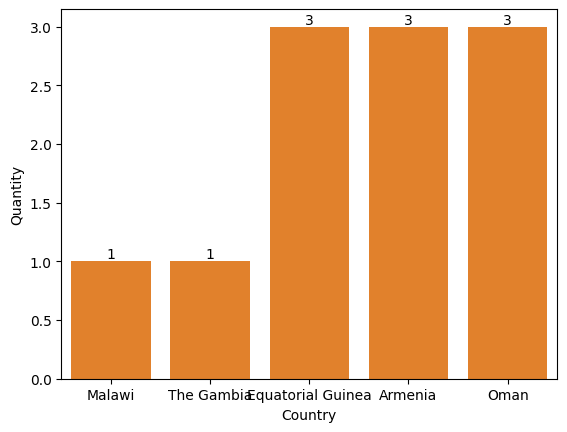

In [ ]:
profit = df.groupby(['Country'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=True).head()
sns.barplot(x='Country',y='Quantity',data=profit).bar_label(sns.barplot(x='Country',y='Quantity',data=profit).containers[0])